In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
from iminuit import Minuit

In [43]:
sns.set_style("darkgrid", {"grid.color": "0", "grid.linestyle": ":"})
plt.rcParams['image.cmap'] = 'hsv'
plt.rcParams['font.size'] = 15

In [44]:
def ahmdalslaw(x,p):
    return 1/(1-p+p/x)

In [45]:
def chi2(func, x, y, stderr, *args):
    return np.sum((y-func(x,*args))**2/stderr**2)


In [51]:
time_1 =  [259.024, 141.225, 96.312, 74.022, 60.0299, 50.182, 43.3645, 38.8303, 34.6402, 31.8546, 29.0912,27.1628,23.501, 21.6553, 18.3178, 15.7089, 12.8628, 10.1654, 8.78313]
gangs1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,12,14,16, 20, 24, 32, 48, 64])
time_1 = time_1[0]/np.array(time_1)

In [52]:
time_2 = np.array([1.25472, 3.1875, 4.21975, 5.66163])
gangs2 = np.array([1, 4, 16, 64])
time_2 = (time_2[0]*gangs2)/time_2

In [53]:
chi = lambda p: chi2(ahmdalslaw, gangs1, time_1, 1, p)
ll = Minuit(chi,p=1)
ll.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.923                      │              Nfcn = 30               │
│ EDM = 5.58e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ p    │ 981.0e-3  │  0.8e-3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────┐
│   │        p │
├───┼──────────┤
│ p │ 7.12e-07 │
└───┴──────────┘

In [54]:
chi = lambda p: chi2(gufstav, gangs2, time_2, 1, p)
ll = Minuit(chi,p=1)
ll.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.3657                     │              Nfcn = 15               │
│ EDM = 8.93e-18 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ p    │   0.211   │   0.015   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────┐
│   │        p │
├───┼──────────┤
│ p │ 0.000238 │
└───┴──────────┘

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


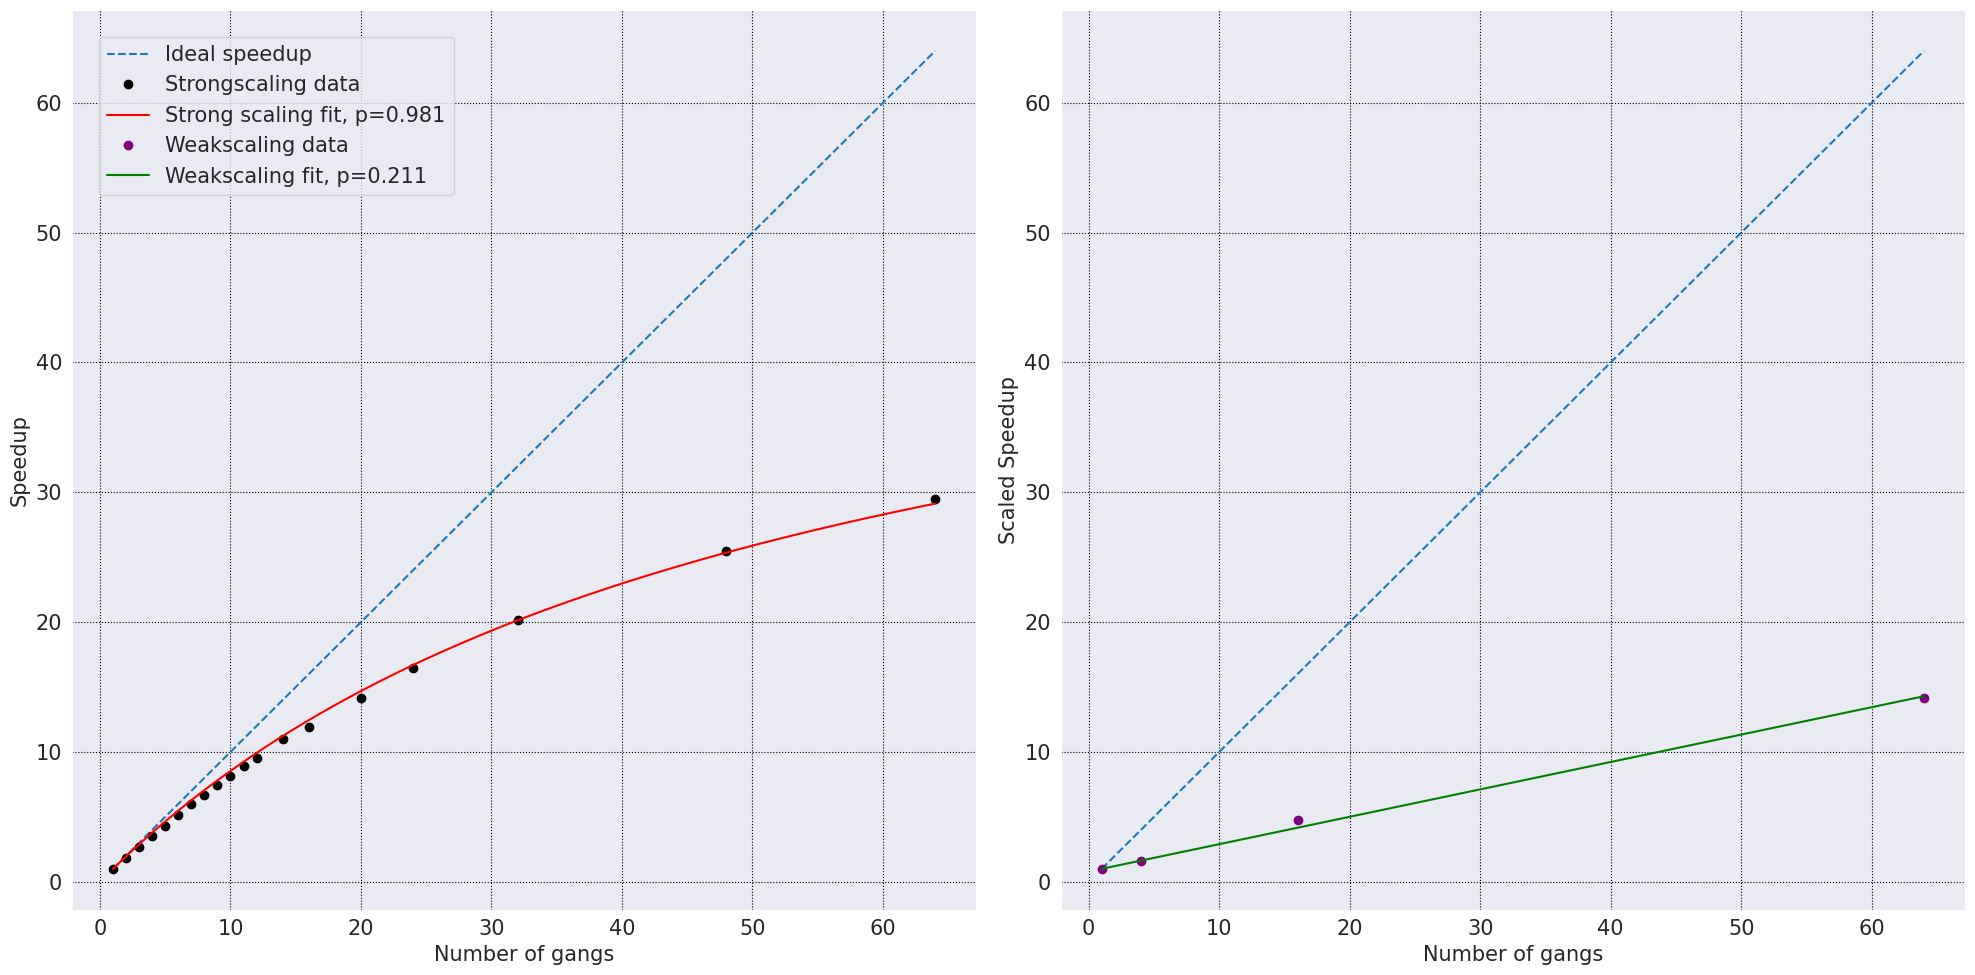

In [65]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].plot(gangs1,gangs1,'--',label="Ideal speedup")
ax[1].plot(gangs2,gangs2,'--')
ax[0].plot(gangs1, time_1,'o',label='Strongscaling data', color = 'black')
ax[1].plot(gangs2, time_2,'o',label='Weakscaling data', color = 'purple')
ax[0].plot(np.linspace(np.amin(gangs1),np.amax(gangs1),1000),ahmdalslaw(np.linspace(np.amin(gangs1),np.amax(gangs1),1000),981.0e-3),'-',color="RED",label='Strong scaling fit, p=0.981')
ax[1].plot(gangs2,gufstav(gangs2,0.211),'-',color="GREEN",label='Weakscaling fit, p=0.211')
ax[0].set_xlabel('Number of gangs')
ax[1].set_xlabel('Number of gangs')
ax[0].set_ylabel("Speedup")
ax[1].set_ylabel("Scaled Speedup")
fig.legend(loc=(0.05,0.8))
fig.tight_layout()
plt.savefig('graph.eps',dpi=192)
plt.show()